# Pandas

## Część I

Będziemy przetwarzać dane z Kaggle odnośnie imion dzieci w USA.

Krok 0: wczytaj pandas

In [3]:
import pandas as pd

Krok 1: wczytaj dane z pliku `US_Baby_Names_right.csv` z katalogu `lab12_files`

In [4]:
baby_names = pd.read_csv('lab12_files/US_Baby_Names_right.csv')

Krok 2: przypisz dane do zmiennej `baby_names`. Zobacz jakiego typu dane są przechowywane i ile jest rekordów

In [6]:
baby_names

,Unnamed: 0,Id,Name,Year,Gender,State,Count
0,11349,11350,Emma,2004,F,AK,62
1,11350,11351,Madison,2004,F,AK,48
2,11351,11352,Hannah,2004,F,AK,46
3,11352,11353,Grace,2004,F,AK,44
4,11353,11354,Emily,2004,F,AK,41
...,...,...,...,...,...,...,...
1016390,5647421,5647422,Seth,2014,M,WY,5
1016391,5647422,5647423,Spencer,2014,M,WY,5
1016392,5647423,5647424,Tyce,2014,M,WY,5
1016393,5647424,5647425,Victor,2014,M,WY,5


Krok 3: podejrzy pierwszych 10 rekordów ze zbioru

In [7]:
baby_names[0:10]

,Unnamed: 0,Id,Name,Year,Gender,State,Count
0,11349,11350,Emma,2004,F,AK,62
1,11350,11351,Madison,2004,F,AK,48
2,11351,11352,Hannah,2004,F,AK,46
3,11352,11353,Grace,2004,F,AK,44
4,11353,11354,Emily,2004,F,AK,41
5,11354,11355,Abigail,2004,F,AK,37
6,11355,11356,Olivia,2004,F,AK,33
7,11356,11357,Isabella,2004,F,AK,30
8,11357,11358,Alyssa,2004,F,AK,29
9,11358,11359,Sophia,2004,F,AK,28


Krok 4: usuń kolumny 'Unnamed: 0' oraz 'Id' 

In [9]:
baby_names.drop(['Unnamed: 0','Id'],axis=1,inplace=True)

Krok 5: czy w zbiorze jest więcej imion kobiet, czy mężczyzn?

In [20]:
m = (baby_names["Gender"] == 'M').sum()
f = (baby_names["Gender"] == 'F').sum()
print(f"ilosc mezczyzn {m} \nilosc kobiet {f}")

ilosc mezczyzn 457549 
ilosc kobiet 558846


Krok 6: zgrupuj wiersze względem imion i wypisz 10 najczęściej pojawiających się imion.

In [49]:
q1 = baby_names.groupby('Name')
q2 = q1.count()['Count'].sort_values(ascending=False)[:10]
q2 = pd.DataFrame({'names':q2.index, 'count':q2.values})
q2

,names,count
0,Riley,1112
1,Avery,1080
2,Jordan,1073
3,Peyton,1064
4,Hayden,1049
5,Taylor,1033
6,Jayden,1031
7,Alexis,984
8,Payton,971
9,Dakota,962


Krok 7: wyniki z Kroku 6 zaprezentuj na wykresie korzystając z `matplotlib`. Przygotuj trzy wykresy, tj. 10 najczęsciej występujących imion: ogółem, u mężczyzn i u kobiet.

<BarContainer object of 10 artists>

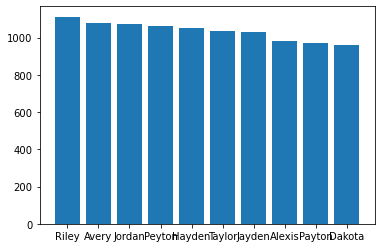

In [76]:
import matplotlib.pyplot as plt
plt.bar(q2['names'],q2['count'])

Krok 8: Jak wiele różnych imion występuje w zbiorze?

In [55]:
q3= len(baby_names['Name'])
q4 = len(baby_names['Name'].unique())
print(f'jest {q4} unikalnych imion sposrod {q3} wszystkich rekordow')

jest 17632 unikalnych imion sposrod 1016395 wszystkich rekordow


Krok 9: Przygotuj generator imion, losujący je zgodnie z rozkłądem prawdopodobieństwa otrzymanym na podstawie przetwarzanego pliku

In [75]:
import numpy as np
def sample(num_values):
    q1 = baby_names.groupby('Name')
    q2 = q1.count()['Count'].sort_values(ascending=False)
    q2 = pd.DataFrame({'names':q2.index, 'count':q2.values})
    uniques = list(q2['names'])
    sum_uniques = q2['count'].sum()
    q2['count'] /= sum_uniques
    distribution = list(q2['count'])
    return np.random.choice(a=uniques,size=num_values,p=distribution)

print(sample(100))

['Kaylee' 'Avyaan' 'Kenadee' 'Kendyl' 'Bryce' 'Sebastian' 'Erick'
 'Shoshana' 'Aliah' 'Marshall' 'Sania' 'Chase' 'Emmit' 'Zechariah'
 'Francisco' 'Izabelle' 'Marcela' 'Nestor' 'Quinton' 'Malia' 'Cristhian'
 'Braxtyn' 'Klara' 'Karen' 'Raul' 'Rory' 'Nava' 'Jayce' 'Bryan' 'Laurel'
 'Kimberly' 'Damien' 'Urijah' 'Madelyne' 'Alondra' 'Gage' 'Rex' 'Lena'
 'Susie' 'Philip' 'Tamya' 'Gabrielle' 'Cross' 'Dennis' 'Alicia'
 'Monserrat' 'Elan' 'Mayah' 'Amalia' 'Calleigh' 'Walker' 'Leia' 'Kaitlin'
 'Alanna' 'Hayes' 'Cheyenne' 'Zariyah' 'Morgan' 'Amaiya' 'Rainey' 'Alden'
 'Sarahi' 'Cerenity' 'Brianna' 'Zamir' 'Averi' 'Lilyana' 'Faith' 'Tahlia'
 'Kaydence' 'Ali' 'Lukas' 'Skyler' 'Tate' 'Kyler' 'Walter' 'Jimmy' 'Chad'
 'Arianna' 'Ann' 'Megan' 'Ivan' 'Keaton' 'Rhett' 'Cesar' 'Cael' 'Joy'
 'Paxton' 'Katheryne' 'Zoey' 'Arthur' 'Connor' 'Anton' 'Norman' 'Alicia'
 'Mabry' 'Gunnar' 'Marcos' 'Keagen' 'Cynthia']


Krok 10: 
- Jakie imie występuje najczęściej?
- Wyznacz średnią, medianę i odchylenie stanadrdowe wystepowania imion.

In [81]:
# 1 Riley- widac w zadaniu u gory
# 2
mean = q2['count'].mean()
median = q2['count'].median()
std = q2['count'].std()
print(f'mean {mean}, median {median}, std {std}')

mean 1035.9, median 1041.0, std 49.969879816634425


## Część II

Krok 1: Wczytaj dane

Krok 2: Podejrzyj pierwsze 25 rekordów

Krok 3: Podejrzyj ostatnie 10 rekordów

Krok 4: Ile jest obserwacji w zbiorze? Ile jest kolumn w zbiorze?

Krok 5: Wypisz nazwy kolumn

Krok 6: Ile różnych zawodów jest w zbiorze?

Krok 7: Przygotuj efektywny wykres na którym przedstawisz procetowy udział poszczególnych zawodów w zbiorze na charplocie
Wykorzystaj https://matplotlib.org/examples/pie_and_polar_charts/pie_demo_features.html

Przygotuj dwa wykresy: 
- jeden z wszystkimi zawodami
- drugi z 10 najcześtrzymi zawodami, pozostałem zawody trafiają do kategorii `Inne`

Krok 8: Przygotuj efektywny wykres na którym przedstawisz 10 najczęstrzych zawodów oraz ile pracuje w nich kobiet a ilu meżczyzn
Wykorzystaj https://matplotlib.org/gallery/api/barchart.html#sphx-glr-gallery-api-barchart-py

Krok 9: Przygotuj efektywny wykres na którym przedstawisz średni wiek pracowników danego zawodu

Krok 10: Przygotuj efektywny wykres na którym przedstawisz średni wiek kobiet i mężczyzn wykonujących dany zawód.